## Test

In this file we will test our model on 5 city of increasing size (which graphs and other stuff are already generated) and then plot execution times and maybe other things.

`N` and `d` can be randomly generated, or maybe not.

Using `launch.py` we can launch our solver with:
- `N` randomly generated order
- `d` deliverers
- on a city `c`
- with timeout `t`

These ideas can be used to create a single program that execute for *x* times the solver for each city , using `N` and `d` generated from a selected probability distribution.

In [24]:
import pandas as pd
import seaborn as sb
import os
import numpy as np

In [42]:
names = ["Visano", "Asola","Montichiari","Brescia","Roma"]

**NB** Time is measured in second (by launch.py)

In [43]:
x = 10; # not unsat times for each city
times = pd.DataFrame(columns=['city','time','unsat'])
N = 10
d = 3

for n in names:
    
    unsats = 0
    c = 0
    
    while (c < x):
        
        cmd = 'python3 launch.py -N ' + str(N) + ' -d ' + str(d) + ' -c ' + str(n) + ' -t 300' 
        print(cmd)
        out = os.popen(cmd).read()
        unsat = ('UNSAT' in out)
        
        unsats += unsat
        c += not unsat
        
        line = [line for line in out.split('\n') if "TIME: " in line]
        time = float(line[0].split(':')[1])
        
        # Add line to dataframe
        row = {'city': n, 'time': time,'unsat': unsat}
        times = times.append(row, ignore_index = True)

        
    # update dataframe csv
    times.to_csv('res.csv', index=False)
    print(n + ': ' + str(unsats) + '/' + str(unsats+x) + ' are unsat.')
        

python3 launch.py -N 10 -d 3 -c Visano -t 300
python3 launch.py -N 10 -d 3 -c Visano -t 300
python3 launch.py -N 10 -d 3 -c Visano -t 300
python3 launch.py -N 10 -d 3 -c Visano -t 300
python3 launch.py -N 10 -d 3 -c Visano -t 300
python3 launch.py -N 10 -d 3 -c Visano -t 300
python3 launch.py -N 10 -d 3 -c Visano -t 300
python3 launch.py -N 10 -d 3 -c Visano -t 300
python3 launch.py -N 10 -d 3 -c Visano -t 300
python3 launch.py -N 10 -d 3 -c Visano -t 300
python3 launch.py -N 10 -d 3 -c Visano -t 300
python3 launch.py -N 10 -d 3 -c Visano -t 300
python3 launch.py -N 10 -d 3 -c Visano -t 300
python3 launch.py -N 10 -d 3 -c Visano -t 300
Visano: 4/14 are unsat.
python3 launch.py -N 10 -d 3 -c Asola -t 300
python3 launch.py -N 10 -d 3 -c Asola -t 300
python3 launch.py -N 10 -d 3 -c Asola -t 300
python3 launch.py -N 10 -d 3 -c Asola -t 300
python3 launch.py -N 10 -d 3 -c Asola -t 300
python3 launch.py -N 10 -d 3 -c Asola -t 300
python3 launch.py -N 10 -d 3 -c Asola -t 300
python3 launch.py

      city        time  unsat
0   Visano    4.170586  False
1   Visano    3.730465   True
2   Visano    4.226416  False
3   Visano    3.849806  False
4   Visano    3.876445  False
..     ...         ...    ...
61    Roma  301.479190  False
62    Roma  300.790893  False
63    Roma  300.853995  False
64    Roma  302.325188  False
65    Roma  300.835473  False

[66 rows x 3 columns]


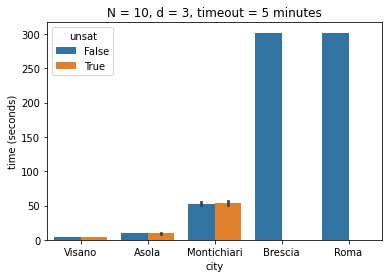

In [45]:
times = pd.read_csv('res.csv')  
print(times)

plot = sb.barplot(data=times, x="city", y="time", hue="unsat")
plot.set_title('N = 10, d = 3, timeout = 5 minutes')
plot.set_ylabel('time (seconds)')
fig = plot.get_figure()
fig.savefig("out.png") 